# SPECTF Heart Data Set

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importing datasets

In [2]:
data_train = pd.read_csv("SPECTFtrain.csv")
data_test = pd.read_csv("SPECTFtest.csv")

In [3]:
data_train.columns

Index(['OVERALL_DIAGNOSIS', ' F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R',
       'F4S', 'F5R', 'F5S', 'F6R', 'F6S', 'F7R', 'F7S', 'F8R', 'F8S', 'F9R',
       'F9S', 'F10R', 'F10S', 'F11R', 'F11S', 'F12R', 'F12S', 'F13R', 'F13S',
       'F14R', 'F14S', 'F15R', 'F15S', 'F16R', 'F16S', 'F17R', 'F17S', 'F18R',
       'F18S', 'F19R', 'F19S', 'F20R', 'F20S', 'F21R', 'F21S', 'F22R', 'F22S'],
      dtype='object')

# Spliting Data for training and testing

In [4]:
X_train=data_train[[' F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R','F4S', 'F5R', 'F5S', 'F6R', 'F6S', 'F7R', 'F7S', 'F8R', 'F8S', 'F9R','F9S', 'F10R', 'F10S', 'F11R', 'F11S', 'F12R', 'F12S', 'F13R', 'F13S','F14R', 'F14S', 'F15R', 'F15S', 'F16R', 'F16S', 'F17R', 'F17S', 'F18R','F18S', 'F19R', 'F19S', 'F20R', 'F20S', 'F21R', 'F21S', 'F22R', 'F22S']]
X_test=data_test[[' F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R','F4S', 'F5R', 'F5S', 'F6R', 'F6S', 'F7R', 'F7S', 'F8R', 'F8S', 'F9R','F9S', 'F10R', 'F10S', 'F11R', 'F11S', 'F12R', 'F12S', 'F13R', 'F13S','F14R', 'F14S', 'F15R', 'F15S', 'F16R', 'F16S', 'F17R', 'F17S', 'F18R','F18S', 'F19R', 'F19S', 'F20R', 'F20S', 'F21R', 'F21S', 'F22R', 'F22S']]
y_train=data_train[['OVERALL_DIAGNOSIS']]
y_test=data_test[['OVERALL_DIAGNOSIS']]

# Decision Trees

In [5]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, np.ravel(y_train,order='C'))
predictDT=modelDT.predict(X_test)

              precision    recall  f1-score   support

           0       0.69      0.28      0.39        40
           1       0.54      0.87      0.67        39

    accuracy                           0.57        79
   macro avg       0.61      0.57      0.53        79
weighted avg       0.61      0.57      0.53        79



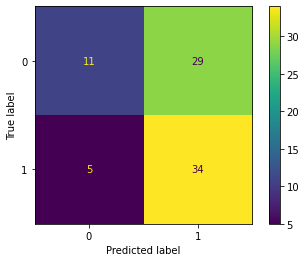

In [6]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictDT)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictDT))


# Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
modelRFC=RandomForestClassifier()
modelRFC.fit(X_train, np.ravel(y_train,order='C'))
predictRFC=modelRFC.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.03      0.05        40
           1       0.50      1.00      0.67        39

    accuracy                           0.51        79
   macro avg       0.75      0.51      0.36        79
weighted avg       0.75      0.51      0.35        79



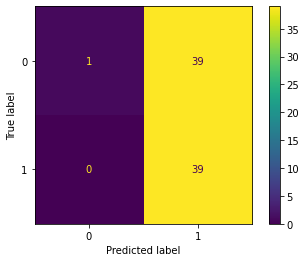

In [8]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictRFC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictRFC))

# Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
modelGNB = GaussianNB()
modelGNB.fit(X_train, np.ravel(y_train,order='C'))
predictGNB=modelGNB.predict(X_test)

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        40
           1       0.86      0.64      0.74        39

    accuracy                           0.77        79
   macro avg       0.79      0.77      0.77        79
weighted avg       0.79      0.77      0.77        79



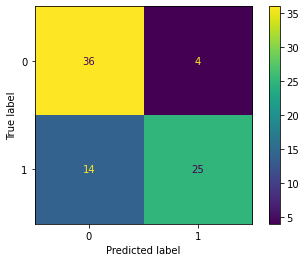

In [10]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictGNB)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictGNB))

# AdaBoost

In [11]:
from sklearn.ensemble import AdaBoostClassifier
modelAda = AdaBoostClassifier()
modelAda.fit(X_train, np.ravel(y_train,order='C'))
predictAda=modelAda.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.25      0.38        40
           1       0.55      0.95      0.70        39

    accuracy                           0.59        79
   macro avg       0.69      0.60      0.54        79
weighted avg       0.69      0.59      0.54        79



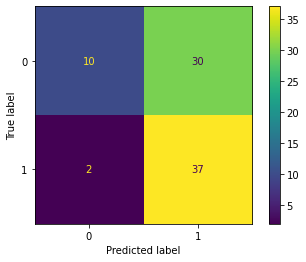

In [12]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictAda)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictAda))

# Data normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)

#scaler.fit(y_train)
#y_train_normalized = scaler.transform(y_train)

scaler.fit(X_test)
X_test_normalized = scaler.transform(X_test)

#scaler.fit(y_train)
#y_test_normalized = scaler.transform(y_test)

# K-Nearest Neighbours

In [14]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN =  KNeighborsClassifier()
modelKNN.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictKNN=modelKNN.predict(X_test_normalized)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.49      1.00      0.66        39

    accuracy                           0.49        79
   macro avg       0.25      0.50      0.33        79
weighted avg       0.24      0.49      0.33        79



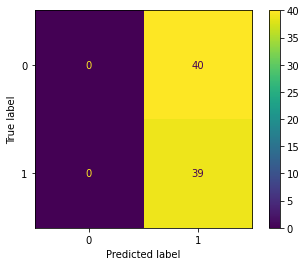

In [15]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictKNN)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictKNN))


# Support Vector Machine

In [16]:
#Support Vector Classifier
from sklearn.svm import SVC
modelSVC = SVC(probability= True)
modelSVC.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictSVC=modelSVC.predict(X_test_normalized)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.49      1.00      0.66        39

    accuracy                           0.49        79
   macro avg       0.25      0.50      0.33        79
weighted avg       0.24      0.49      0.33        79



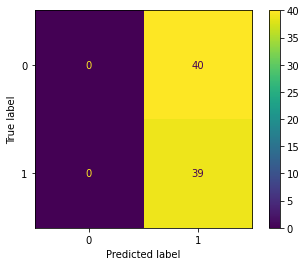

In [17]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictSVC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictSVC))

In [18]:
# Linear Support Vector Classifier
from sklearn.svm import LinearSVC
modelLSVC = LinearSVC()
modelLSVC.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictLSVC=modelLSVC.predict(X_test_normalized)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.49      1.00      0.66        39

    accuracy                           0.49        79
   macro avg       0.25      0.50      0.33        79
weighted avg       0.24      0.49      0.33        79



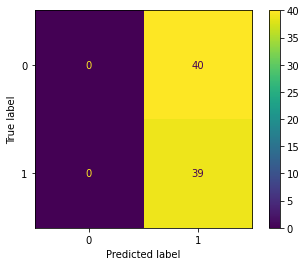

In [19]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictLSVC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictLSVC))

# Multi-Layer Perceptron

In [20]:
from sklearn.neural_network import MLPClassifier
modelMLP =  MLPClassifier()
modelMLP.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictMLP=modelMLP.predict(X_test_normalized)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.49      1.00      0.66        39

    accuracy                           0.49        79
   macro avg       0.25      0.50      0.33        79
weighted avg       0.24      0.49      0.33        79



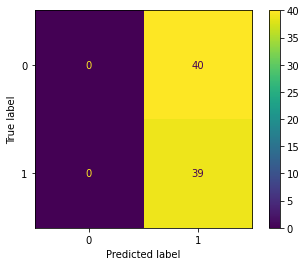

In [21]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictMLP)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictMLP))

# ROC and AUC

In [22]:
r_probs =[0 for _ in range(len(y_test))]
dt_probs=modelDT.predict_proba(X_test)
rf_probs=modelRFC.predict_proba(X_test)
nb_probs=modelGNB.predict_proba(X_test)
ada_probs=modelAda.predict_proba(X_test)
knn_probs=modelKNN.predict_proba(X_test_normalized)
svm_probs=modelSVC.predict_proba(X_test_normalized)
lsvm_probs=modelLSVC._predict_proba_lr(X_test_normalized)
mlp_probs=modelMLP.predict_proba(X_test_normalized)

In [23]:
dt_probs=dt_probs[:,1]
rf_probs=rf_probs[:, 1]
nb_probs=nb_probs[:, 1]
ada_probs=ada_probs[:, 1]
knn_probs=knn_probs[:, 1]
svm_probs=svm_probs[:, 1]
lsvm_probs=lsvm_probs[:, 1]
mlp_probs=mlp_probs[:, 1]

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

In [25]:
r_auc=roc_auc_score(y_test,r_probs)
dt_auc= roc_auc_score(y_test,dt_probs)
rf_auc= roc_auc_score(y_test,rf_probs)
nb_auc= roc_auc_score(y_test,nb_probs)
ada_auc= roc_auc_score(y_test,ada_probs)
knn_auc= roc_auc_score(y_test,knn_probs)
svm_auc= roc_auc_score(y_test,svm_probs)
lsvm_auc= roc_auc_score(y_test,lsvm_probs)
mlp_auc= roc_auc_score(y_test,mlp_probs)

In [26]:
r_fpr,r_tpr, _ = roc_curve(y_test,r_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test,dt_probs)
rf_fpr, rf_tpr, _= roc_curve(y_test,rf_probs)
nb_fpr, nb_tpr, _= roc_curve(y_test,nb_probs)
ada_fpr, ada_tpr, _= roc_curve(y_test,ada_probs)
knn_fpr, knn_tpr, _= roc_curve(y_test,knn_probs)
svm_fpr, svm_tpr, _= roc_curve(y_test,svm_probs)
lsvm_fpr, lsvm_tpr, _= roc_curve(y_test,lsvm_probs)
mlp_fpr, mlp_tpr, _= roc_curve(y_test,mlp_probs)

In [27]:
import matplotlib.pyplot as plt

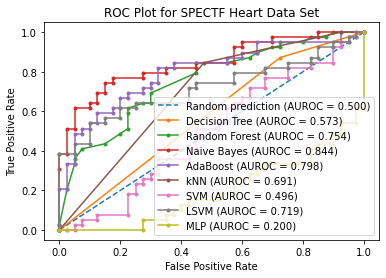

In [28]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoost (AUROC = %0.3f)' % ada_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='kNN (AUROC = %0.3f)' % knn_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(lsvm_fpr, lsvm_tpr, marker='.', label='LSVM (AUROC = %0.3f)' % lsvm_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP (AUROC = %0.3f)' % mlp_auc)

# Title
plt.title('ROC Plot for SPECTF Heart Data Set')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()